In [183]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import wandb
api = wandb.Api()

plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["font.family"] = "Lato"

In [184]:
ckpt_path = "checkpoints/"

ids_and_ckpts = {
    "H": {
        "1": ("H_ferminet_scalar_1.pkl", "b8bpsbz4"),  # 0: -0.0870
        "2": ("H_ferminet_scalar_2.pkl", "y5bldmf8"),  # 16: -0.0972
        "more_1": ("H_ferminet_scalar_more_1.pkl", "n0g8mkr8"),  # 0: -0.1049
        "more_2": ("H_ferminet_scalar_more_2.pkl", "0of5z5ub"),  # 12: 0.1058
        "l1_less_2": ("H_ferminet_scalar_l1_less_2.pkl", "spu2loro"),  # 15: -0.3090 BEST
        "l1_less_customlr_long": ("H_ferminet_scalar_l1_less_customlr_long.pkl", "mre6o5xd"),  # 729: -0.2921
    },
    "He": {
        "1": ("He_ferminet_scalar_1.pkl", "yn6imffy"),  # 57: -1.0362
        "2": ("He_ferminet_scalar_2.pkl", "ddf4ysbk"),  # 93: -1.9913
        "more_1": ("He_ferminet_scalar_more_1.pkl", "rw5m98qe"),  # 71: -1.9308
        "more_2": ("He_ferminet_scalar_more_2.pkl", "20oq8qka"),  # 62: -1.8733
        "l1_less_2": ("He_ferminet_scalar_l1_less_2.pkl", "vevriv9j"),  # 96: -2.1774
        "l1_less_2_long": ("He_ferminet_scalar_l1_less_2_long.pkl", "8slh6c2d"),  # 914: -2.4251 BEST
    },
    "H2+": {
        "1": ("H2+_ferminet_scalar_1.pkl", "rayic6q6"),  # 0: -0.1891
        "2": ("H2+_ferminet_scalar_2.pkl", "296pt5b8"),  # 9: -0.2489
        "more_1": ("H2+_ferminet_scalar_more_1.pkl", "ylthkuf8"),  # 11: -0.2619
        "more_2": ("H2+_ferminet_scalar_more_2.pkl", "4uxuui1m"),  # 0: -0.2563
        "l1_less_2": ("H2+_ferminet_scalar_l1_less_2.pkl", "yr5heox6"),  # 0: -0.6743
        "l1_less_fixedlr_long": ("H2+_ferminet_scalar_l1_less_fixedlr_long.pkl", "h4bzsdal"),  # 512: -0.6800 BEST
    },
    "H2": {
        "1": ("H2_ferminet_scalar_1.pkl", "3438ahau"),  # 88: -1.2669
        "2": ("H2_ferminet_scalar_2.pkl", "pmqb7yuv"),  # 57: -1.1567
        "more_1": ("H2_ferminet_scalar_more_1.pkl", "10wxy281"),  # 83: -1.2929 BEST
        "more_2": ("H2_ferminet_scalar_more_2.pkl", "4xwns5qx"),  # 20: -1.3181
        "l1_less_2": ("H2_ferminet_scalar_l1_less_2.pkl", "t8ohpbp7"),  # 2: -1.0282
        "more_fixedlr_long": ("H2_ferminet_scalar_more_fixedlr_long.pkl", "iz3tftg5"),  # 197: -1.2218
    },
    "BeH2_bad": {
        "1": ("BeH2_ferminet_scalar_1.pkl", "j2cbfg5s"),  # 45: -13.7685
        "2": ("BeH2_ferminet_scalar_2.pkl", "psv4u0tr"),  # 77: -12.8524
        "more_1": ("BeH2_ferminet_scalar_more_1.pkl", "4xkuvu20"),  # 78: -14.5093
        "more_2": ("BeH2_ferminet_scalar_more_2.pkl", "uejc1roy"),  # 4: -13.6920
    },
    "BeH2": {
        "1": ("BeH2_good_ferminet_scalar_1.pkl", "5m0goe5u"),  # 0: -9.0676
        "2": ("BeH2_good_ferminet_scalar_2.pkl", "9lbaholr"),  # 21: -9.8009
        "more_1": ("BeH2_good_ferminet_scalar_more_1.pkl", "ltq2f9e4"),  # 17: -9.0971
        "more_2": ("BeH2_good_ferminet_scalar_more_2.pkl", "volr2fpb"),  # 19: -9.9909
        "more_customlr_long": ("BeH2_ferminet_scalar_more_customlr_long.pkl", "9zd8woev"),  # 39: -9.2652 BEST
    },
    "BH3": {
        "1": ("BH3_ferminet_scalar_1.pkl", "b0nb0lsv"),  # 29: -16.7939
        "2": ("BH3_ferminet_scalar_2.pkl", "slavs5kj"),  # 14: -16.5270
        "more_1": ("BH3_ferminet_scalar_more_1.pkl", "l9qaf62m"),  # 28: -17.7303
        "more_2": ("BH3_ferminet_scalar_more_2.pkl", "7cbjvbna"),  # 27: -17.2628
        "l5_moremore_1_long": ("BH3_ferminet_scalar_l5_moremore_1_long.pkl", "qp1vg0d0"),  # 529: -19.2317 BEST
    },
    "H_toy": {
        "1": ("H_toy_1.pkl", "kfmzozk8"),  # 2: 0.1668
        "2": ("H_toy_2.pkl", "8eugjyfu"),  # 2: 0.2356
        "new_1_s1": ("H_toy_new_1_s1.pkl", "5osjnl1j"),  # 59: -0.4498
        "new_1_s1_long": ("H_toy_new_1_s1_long.pkl", "iag3r435"),  # 486: -0.4437
        "new_1": ("H_toy_new_1.pkl", "hc7mzita"),  # 89: -0.2665
        "new_2_s1": ("H_toy_new_2_s1.pkl", "9rair2u0"),  # 75: -0.4528
        "new_2": ("H_toy_new_2.pkl", "vyshwjil"),  # 1: -0.2694
    },
    "He_toy": {
        "1": ("He_toy_1.pkl", "wq2s5rgh"),  # 55: -0.6509
        "2": ("He_toy_2.pkl", "1geymlaj"),  # 68: -0.6014
        "new_1_s1": ("He_toy_new_1_s1.pkl", "vdny9auu"),  # 5: -2.3733
        "new_1": ("He_toy_new_1.pkl", "diezmoq2"),  # 70: -1.9883
        "new_2_s1": ("He_toy_new_2_s1.pkl", "jeet8rve"),  # 16: -2.3782
        "new_2": ("He_toy_new_2.pkl", "hcr7z8xx"),  # 68: -2.3479
        "new_b512_2_long": ("He_toy_new_b512_2_long.pkl", "cf42ciju"),  # 406: -2.3827
    },
}

In [185]:
df = api.run("zli11010/e3ferminet_main/hcr7z8xx").history()

In [186]:
df

,loss,_step,energy,_runtime,_timestamp
0,-1.961288,15770,NaN,662.394479,1.683427e+09
1,-2.754166,29615,NaN,1315.315521,1.683427e+09
2,-2.370602,25808,NaN,1138.099786,1.683427e+09
3,-2.084817,48890,NaN,2229.412582,1.683428e+09
4,-1.843847,31932,NaN,1422.005435,1.683427e+09
...,...,...,...,...,...
495,-2.285456,23912,NaN,1050.130996,1.683427e+09
496,-2.191743,34544,NaN,1545.041155,1.683427e+09
497,-2.355178,3370,NaN,168.484583,1.683426e+09
498,-2.316701,47090,NaN,2144.019985,1.683428e+09


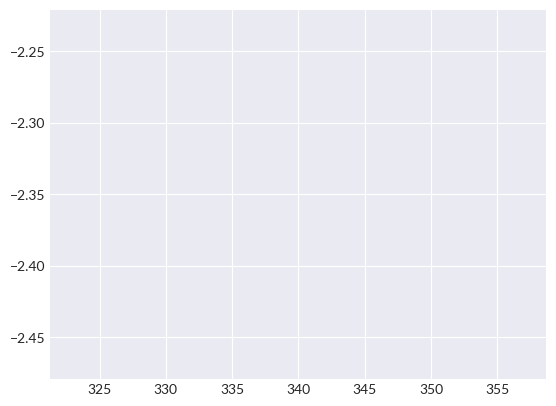

In [187]:
plt.plot(df.index, df['energy'])

In [188]:
import json
import pickle as pkl
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from train import E3FerminetAtom
from train_mol import E3FerminetMol

In [189]:
mols = [
    ("H", "l1_less_2"),
    ("He", "l1_less_2_long"),
    ("H2+", "l1_less_fixedlr_long"),
    ("H2", "more_1"),
    ("BeH2", "more_customlr_long"),
    ("BH3", "l5_moremore_1_long")
]

fig = make_subplots(rows=1, cols=6)

coords = []

for i, (mol, setting) in enumerate(mols):
    weights_file, run_id = ids_and_ckpts[mol][setting]
    config = api.run(f"zli11010/e3ferminet_main/{run_id}").config
    mol_model = E3FerminetMol(config)
    mol_model.MH_warmup = 2000
    mol_model.load_weights(os.path.join(ckpt_path, weights_file))
    # mol_model.init_weights()
    coords_batch = mol_model.sampler(mol_model.random_key, 512, mol_model.N_up+mol_model.N_down, mol_model.Zs, mol_model.nuclei_coords)
    coords_df = pd.DataFrame(coords_batch.reshape((-1, 3)), columns=['x', 'y', 'z'])
    print(run_id)
    print(coords_df.head())
    coords_df["mol"] = mol
    coords_df["particle"] = "electron"
    coords_df["size"] = 1
    nuclei_df = pd.DataFrame(config["nuclei_coords"], columns=['x', 'y', 'z'])
    nuclei_df["mol"] = mol
    nuclei_df["particle"] = "nucleus"
    nuclei_df["size"] = 1
    coords.append(coords_df)
    coords.append(nuclei_df)

coords_df = pd.concat(coords)

#     fig.add_trace(
#         go.Scatter(x=coords_df['x'], y=coords_df['y']),
#         row=1, col=i+1
#     )

# fig.update_layout(height=300, width=600, title_text="Side By Side Subplots")
# fig.show()

spu2loro
          x         y         z
0 -2.013305  1.623825  1.109530
1 -1.649832 -1.201911 -0.366035
2  2.012966 -1.037272 -1.510119
3  1.777430 -1.413082  0.505697
4 -1.097692 -0.804861 -0.145213
8slh6c2d
          x         y         z
0  1.090719  1.244754  0.090414
1 -0.119301 -0.676135 -0.103341
2 -1.996889 -1.830287 -2.180161
3  0.177795  0.035933  1.041756
4 -0.421791  0.172194  0.467475
h4bzsdal
          x         y         z
0  0.881342  0.805402  1.623675
1  1.333344 -1.240237  0.367126
2  3.097819  0.160331 -1.089466
3  1.655501 -1.045627  0.060547
4  1.176378 -0.753299 -0.155444
10wxy281
           x          y         z
0   1.630121   0.821469  0.606606
1  28.749008  -4.833795  5.916047
2  -2.126542  -0.927471 -1.393693
3  20.629602  11.086994 -8.280434
4  -3.495130 -13.143643  7.274258
9zd8woev
          x         y         z
0 -2.615956 -0.534924  0.236443
1  2.589298  0.128146  0.170040
2  3.391921  1.802233  2.302012
3  2.786977  0.833740  0.484002
4 -1.951872 -0.

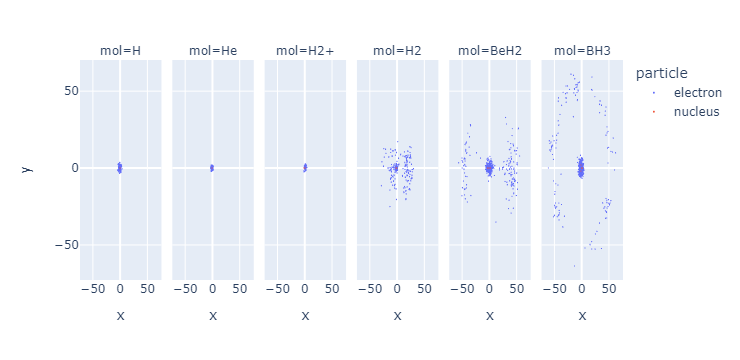

In [192]:
fig = px.scatter(coords_df, x='x', y='y', color="particle", facet_col="mol", width=800, height=235)
r = 0.3
for i, (mol, setting) in enumerate(mols):
    weights_file, run_id = ids_and_ckpts[mol][setting]
    config = api.run(f"zli11010/e3ferminet_main/{run_id}").config
    nuclei_coords = config["nuclei_coords"]
    for x, y, z in nuclei_coords:
        fig.add_shape(type="circle", xref="x", yref="y",
                      x0=x-r, y0=y-r, x1=x+r, y1=y+r, row=1, col=i+1,
                      line_width=0,
                      fillcolor="#EF553B"
        )
fig.update_traces(marker={"size": 1})
# fig.update_xaxes(range=[-5, 5])
# fig.update_yaxes(range=[-5, 5])

fig_config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'scale':8 # Multiply title/legend/axis/canvas sizes by this factor
  }
}    
fig.show(config=fig_config)

In [78]:
coords_batch = atom_model.sampler(atom_model.random_key, 500, atom_model.N_up+atom_model.N_down, atom_model.Zs, atom_model.nuclei_coords)

In [79]:
coords_df = pd.DataFrame(coords_batch.reshape((-1, 3)), columns=['x', 'y', 'z'])

In [80]:
len(coords_df)

4000

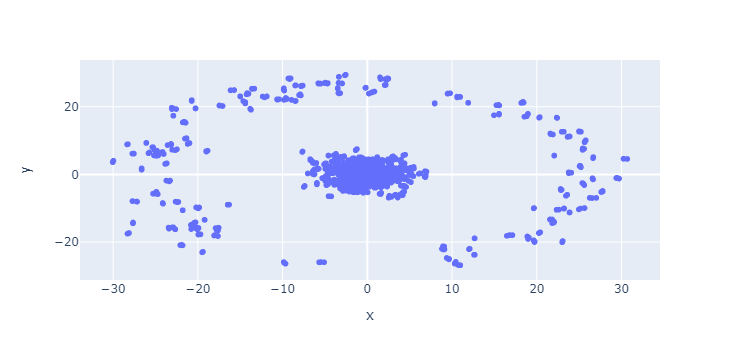

In [81]:
import plotly.express as px

px.scatter(coords_df, x='x', y='y')